In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r"D:\Surya\Office and resume\Programming study material\Projects\credit_card_transactions.csv\Transactions.csv")

In [7]:
df.head(10)

,Full Name,dob,gender,job,street,city,state,zip,cc_num,category,...,longitude,city_pop,trans_num,merchant,unix_time,Time U,merch_lat,merch_long,is_fraud,merch_zipcode
0,Jennifer Banks,1988-03-09,Female,"Psychologist, counselling",561 Perry Cove,Moravian Falls,NC,28654,2.703190e+15,misc_net,...,-81.1781,3495,0b242abb623afc578575680df30655b9,"fraud_Rippin, Kub and Mann",1325376018,00:00:18,36.011293,-82.048315,0,28705
1,Stephanie Gill,1978-06-21,Female,Special educational needs teacher,43039 Riley Greens Suite 393,Orient,WA,99160,6.304230e+11,grocery_pos,...,-118.2105,149,1f76529f8574734946361c461b024d99,"fraud_Heller, Gutmann and Zieme",1325376044,00:00:44,49.159047,-118.186462,0,0
2,Edward Sanchez,1962-01-19,Male,Nature conservation officer,594 White Dale Suite 530,Malad City,ID,83252,3.885950e+13,entertainment,...,-112.2620,4154,a1a22d70485983eac12b5b88dad1cf95,fraud_Lind-Buckridge,1325376051,00:00:51,43.150704,-112.154481,0,83236
3,Jeremy White,1967-01-12,Male,Patent attorney,9443 Cynthia Court Apt. 038,Boulder,MT,59632,3.534090e+15,gas_transport,...,-112.1138,1939,6b849c168bdad6f867558c3793159a81,"fraud_Kutch, Hermiston and Farrell",1325376076,00:01:16,47.034331,-112.561071,0,0
4,Tyler Garcia,1986-03-28,Male,Dance movement psychotherapist,408 Bradley Rest,Doe Hill,VA,24433,3.755340e+14,misc_pos,...,-79.4629,99,a41d7549acf90789359a9aa5346dcb46,fraud_Keeling-Crist,1325376186,00:03:06,38.674999,-78.632459,0,22844
5,Jennifer Conner,1961-06-19,Female,Transport planner,4655 David Island,Dublin,PA,18917,4.767270e+15,gas_transport,...,-75.2045,2158,189a841a0a8ba03058526bcfe566aab5,"fraud_Stroman, Hudson and Erdman",1325376248,00:04:08,40.653382,-76.152667,0,17972
6,Kelsey Richards,1993-08-16,Female,Arboriculturist,889 Sarah Station Suite 624,Holcomb,KS,67851,3.007470e+13,grocery_net,...,-100.9893,2691,83ec1cc84142af6e2acf10c44949e720,fraud_Rowe-Vandervort,1325376282,00:04:42,37.162705,-100.153370,0,0
7,Steven Williams,1947-08-21,Male,"Designer, multimedia",231 Flores Pass Suite 720,Edinburg,VA,22824,6.011360e+15,gas_transport,...,-78.6003,6018,6d294ed2cc447d2c71c7171a3d54967c,fraud_Corwin-Collins,1325376308,00:05:08,38.948089,-78.540296,0,22644
8,Heather Chase,1941-03-07,Female,Public affairs consultant,6888 Hicks Stream Suite 954,Manor,PA,15665,4.922710e+15,misc_pos,...,-79.6607,1472,fc28024ce480f8ef21a32d64c93a29f5,fraud_Herzog Ltd,1325376318,00:05:18,40.351813,-79.958146,0,15236
9,Melissa Aguilar,1974-03-28,Female,Pathologist,21326 Taylor Squares Suite 708,Clarksville,TN,37040,2.720830e+15,grocery_pos,...,-87.3490,151785,3b9014ea8fb80bd65de0b1463b00b00e,"fraud_Schoen, Kuphal and Nitzsche",1325376361,00:06:01,37.179198,-87.485381,0,42442


In [9]:
Location_spending = df.groupby(["city", "state"]).agg(
    transaction_count=("amt", "count"),
    total_spending=("amt", "sum"),
    avg_transaction_value=("amt", "mean")
).reset_index()

In [13]:
print(Location_spending)

                          city state  transaction_count  total_spending  \
0                      Achille    OK                431        22925.73   
1                      Acworth    NH               1689       164750.91   
2                        Adams    WI                409        24166.66   
3                        Afton    MI                841        51330.81   
4                        Afton    MN                828        56648.59   
..                         ...   ...                ...             ...   
908                Woods Cross    UT                424        41027.47   
909                  Woodville    AL               1729        87390.74   
910  Yellowstone National Park    WY                412        27779.04   
911                    Zaleski    OH               1239       115099.37   
912                    Zavalla    TX               1267        86061.06   

     avg_transaction_value  
0                53.191949  
1                97.543464  
2           

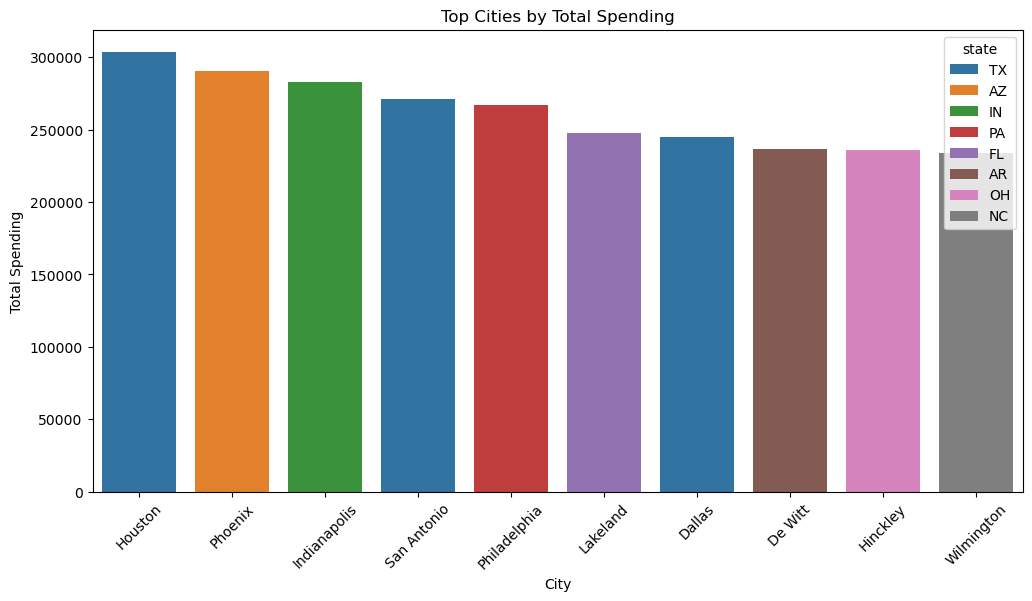

In [17]:
# Sort cities by spending and take top 10
top_cities = Location_spending.sort_values("total_spending", ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x="city", y="total_spending", hue="state", dodge=False)
plt.xticks(rotation=45)
plt.title("Top Cities by Total Spending")
plt.ylabel("Total Spending")
plt.xlabel("City")
plt.show()
